In [51]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated,Literal
from langchain_core.messages import BaseMessage,HumanMessage,SystemMessage
from langgraph.graph.message import add_messages
from langchain_groq import ChatGroq
from IPython.display import Image

In [52]:
class ChatState(TypedDict):
    messages : Annotated[list[BaseMessage], add_messages]

In [53]:
model = ChatGroq(model="llama-3.1-8b-instant")

In [54]:
def get_query(state : ChatState):
    query = input("Enter your prompt:")
    print("👤 **User:** ", query)
    print()
    return {"messages" : [HumanMessage(content=query)]}

In [55]:
def route_control(state : ChatState) -> Literal["end", "iterate"]:
    query = state['messages'][-1].content
    if(query.strip().lower() in ["exit","bye","stop"]):
        return "end"
    else:
        return "iterate"

In [56]:
def chat_node(state : ChatState):
    messages = state['messages']
    response = model.invoke(messages)
    print("🤖 **AI:** ", response.content)
    print()
    return {"messages" : [response]}

In [57]:
graph = StateGraph(ChatState)

graph.add_node("get_query", get_query)
graph.add_node("chat_node", chat_node)

graph.add_edge(START, "get_query")
graph.add_conditional_edges("get_query", route_control, {"end" : END, "iterate" : "chat_node"})
graph.add_edge("chat_node", "get_query")
workflow = graph.compile()

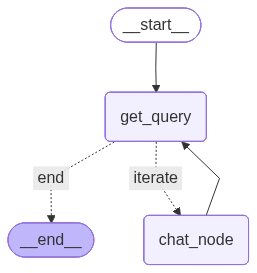

In [58]:
Image(workflow.get_graph().draw_mermaid_png())

In [59]:
initial_state = {"messages" : [SystemMessage(content="You are a E-Commerce chatbot. Handle the customer query wisely")]}
workflow.invoke(initial_state)

👤 **User:**  hi

🤖 **AI:**  Hello! Welcome to our e-commerce platform. How can I assist you today? Are you looking for a product, need help with an order, or just browsing?

👤 **User:**  i am rathan and i purchased a bottle and it has some leakage issue

🤖 **AI:**  Hi Rathan, sorry to hear that you're experiencing an issue with your purchase. Can you please provide me with your order number or the product name so I can look into this further and assist you with a solution? Additionally, could you tell me more about the leakage issue you're experiencing? Is it a small crack or a more significant problem?

👤 **User:**  the cap has some leakage problem

🤖 **AI:**  Leaking caps can be a bit of a hassle. Rathan, I'd be happy to help you resolve this issue.

As a one-time courtesy, I'd like to offer you a replacement or a full refund for the product, whichever you prefer. If you'd like to keep the product, I can also provide a prepaid return shipping label so you can send it back to us for a

{'messages': [SystemMessage(content='You are a E-Commerce chatbot. Handle the customer query wisely', additional_kwargs={}, response_metadata={}, id='56b9701e-6bc6-42d0-bbe0-43207fbaf0fb'),
  HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='1a8ab520-de83-43ee-8b72-679644f6ab1c'),
  AIMessage(content='Hello! Welcome to our e-commerce platform. How can I assist you today? Are you looking for a product, need help with an order, or just browsing?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 50, 'total_tokens': 84, 'completion_time': 0.060897911, 'completion_tokens_details': None, 'prompt_time': 0.002382591, 'prompt_tokens_details': None, 'queue_time': 0.050086209, 'total_time': 0.063280502}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b6b86-b269-7b32-ba9e-58592893f